In [6]:
import xarray as xr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy
from pathlib import Path

dir_outputs = Path("../outputs")

fnE = dir_outputs / "test_var_E.nc"
fnD = dir_outputs / "test_var_D.nc"

In [2]:
dsE = xr.load_dataset(fnE)
dsD = xr.load_dataset(fnD)

In [3]:
dsD

<xarray.Dataset>
Dimensions:              (time: 2, step: 16)
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-02 2017-01-05
    surface              float64 0.0
    depthBelowLandLayer  float64 100.0
  * step                 (step) timedelta64[ns] 0 days 1 days ... 15 days
    valid_time           (time, step) datetime64[ns] 2017-01-02 ... 2017-01-20
Data variables:
    t2m                  (time, step) float32 0.07706 0.2053 ... 13.82 14.01
    d2m                  (time, step) float32 0.2121 0.375 0.7924 ... 18.5 18.07
    stl4                 (time, step) float32 0.00904 0.009303 ... 0.03601
    ssrd                 (time, step) float64 1.612e+08 2.604e+08 ... 3.656e+09
    strd                 (time, step) float64 2.177e+08 6.121e+08 ... 9.413e+09
    w10                  (time, step) float32 0.1091 0.2944 ... 6.188 5.864
    w100                 (time, step) float32 0.1827 0.5242 ... 11.51 10.72

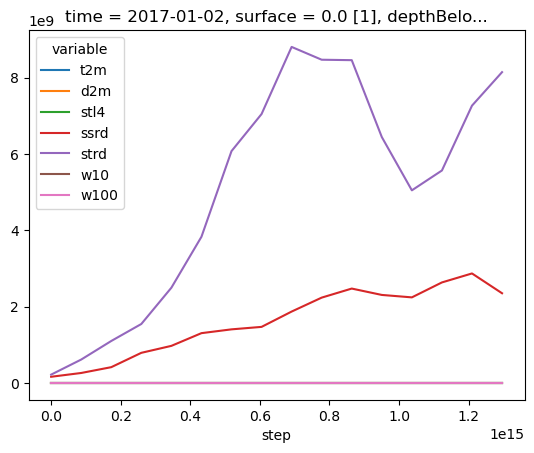

In [4]:
dsE.isel(time=0).to_array(dim='variable').plot.line(x="step",hue="variable")

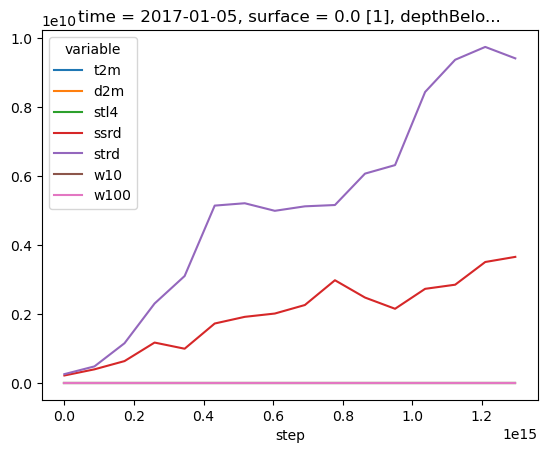

In [5]:
dsE.isel(time=1).to_array(dim='variable').plot.line(x="step",hue="variable")

In [15]:

dsE_max = dsE.max(dim=['step','time'])
dsE_max

<xarray.Dataset>
Dimensions:              ()
Coordinates:
    surface              float64 0.0
    depthBelowLandLayer  float64 100.0
Data variables:
    t2m                  float32 14.78
    d2m                  float32 20.12
    stl4                 float32 0.04356
    ssrd                 float64 3.656e+09
    strd                 float64 9.744e+09
    w10                  float32 6.193
    w100                 float32 11.51

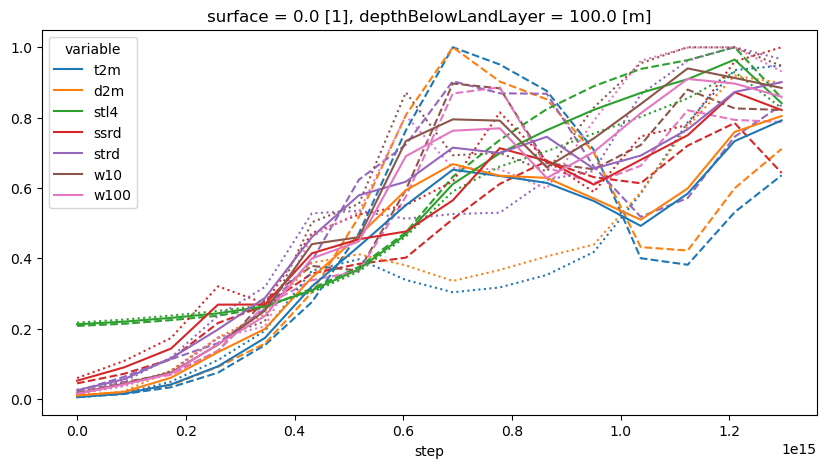

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

(dsE.isel(time=0)/dsE_max).to_array(dim='variable').plot.line(x="step",hue="variable",ax=ax, linestyle='--', label='E')
ax.set_prop_cycle(None)
(dsE.isel(time=1)/dsE_max).to_array(dim='variable').plot.line(x="step",hue="variable",ax=ax, linestyle=':', label='E')
ax.set_prop_cycle(None)
(dsE.mean(dim='time')/dsE_max).to_array(dim='variable').plot.line(x="step",hue="variable",ax=ax, linestyle='-', label='E')


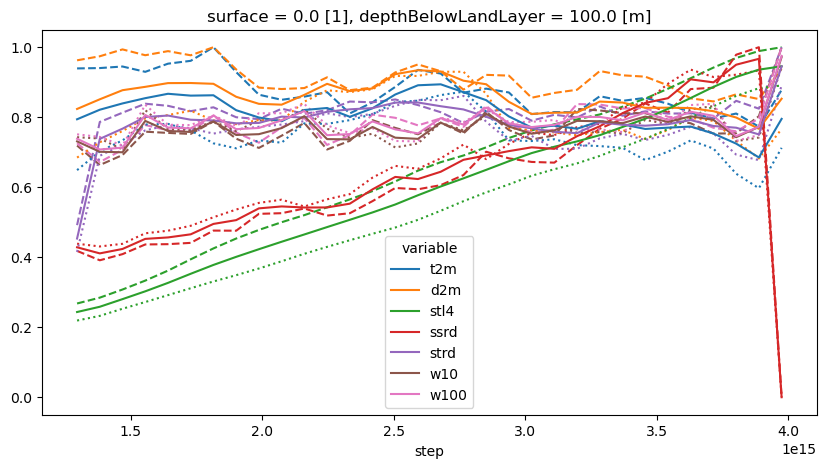

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

dsD_max = dsD.max(dim=['step','time'])
(dsD.isel(time=0)/dsD_max).to_array(dim='variable').plot.line(x="step",hue="variable",ax=ax, linestyle='--', label='E')
ax.set_prop_cycle(None)
(dsD.isel(time=1)/dsD_max).to_array(dim='variable').plot.line(x="step",hue="variable",ax=ax, linestyle=':', label='E')
ax.set_prop_cycle(None)
(dsD.mean(dim='time')/dsD_max).to_array(dim='variable').plot.line(x="step",hue="variable",ax=ax, linestyle='-', label='E')
